# Bike Sharing - Linear Regression Assignment

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import statsmodels
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Step 1: Reading, Understanding and Visualization of Data

### Importing  the Dataset

In [3]:
bike_sharing = pd.read_csv('day.csv')

### Checking Dataset

In [4]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_sharing.shape

(730, 16)

In [6]:
# Checking null values

bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# checking for missing values

bike_sharing.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

#### Droping instant column as it only have record index

In [9]:
bike_sharing = bike_sharing.drop('instant', axis= 1)

#### Droping dteday column as it contain dates and date details are already avaliable in yr, mnth and weekday column


In [10]:
bike_sharing = bike_sharing.drop('dteday', axis= 1)

#### Droping casual and registered column because cnt column is the sum of both of them

In [11]:
bike_sharing = bike_sharing.drop(['casual', 'registered'], axis= 1)


In [12]:
# Re-Checking the dataset again

bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Data Visualization 
#### Numarical Variable

<Figure size 2160x1440 with 0 Axes>

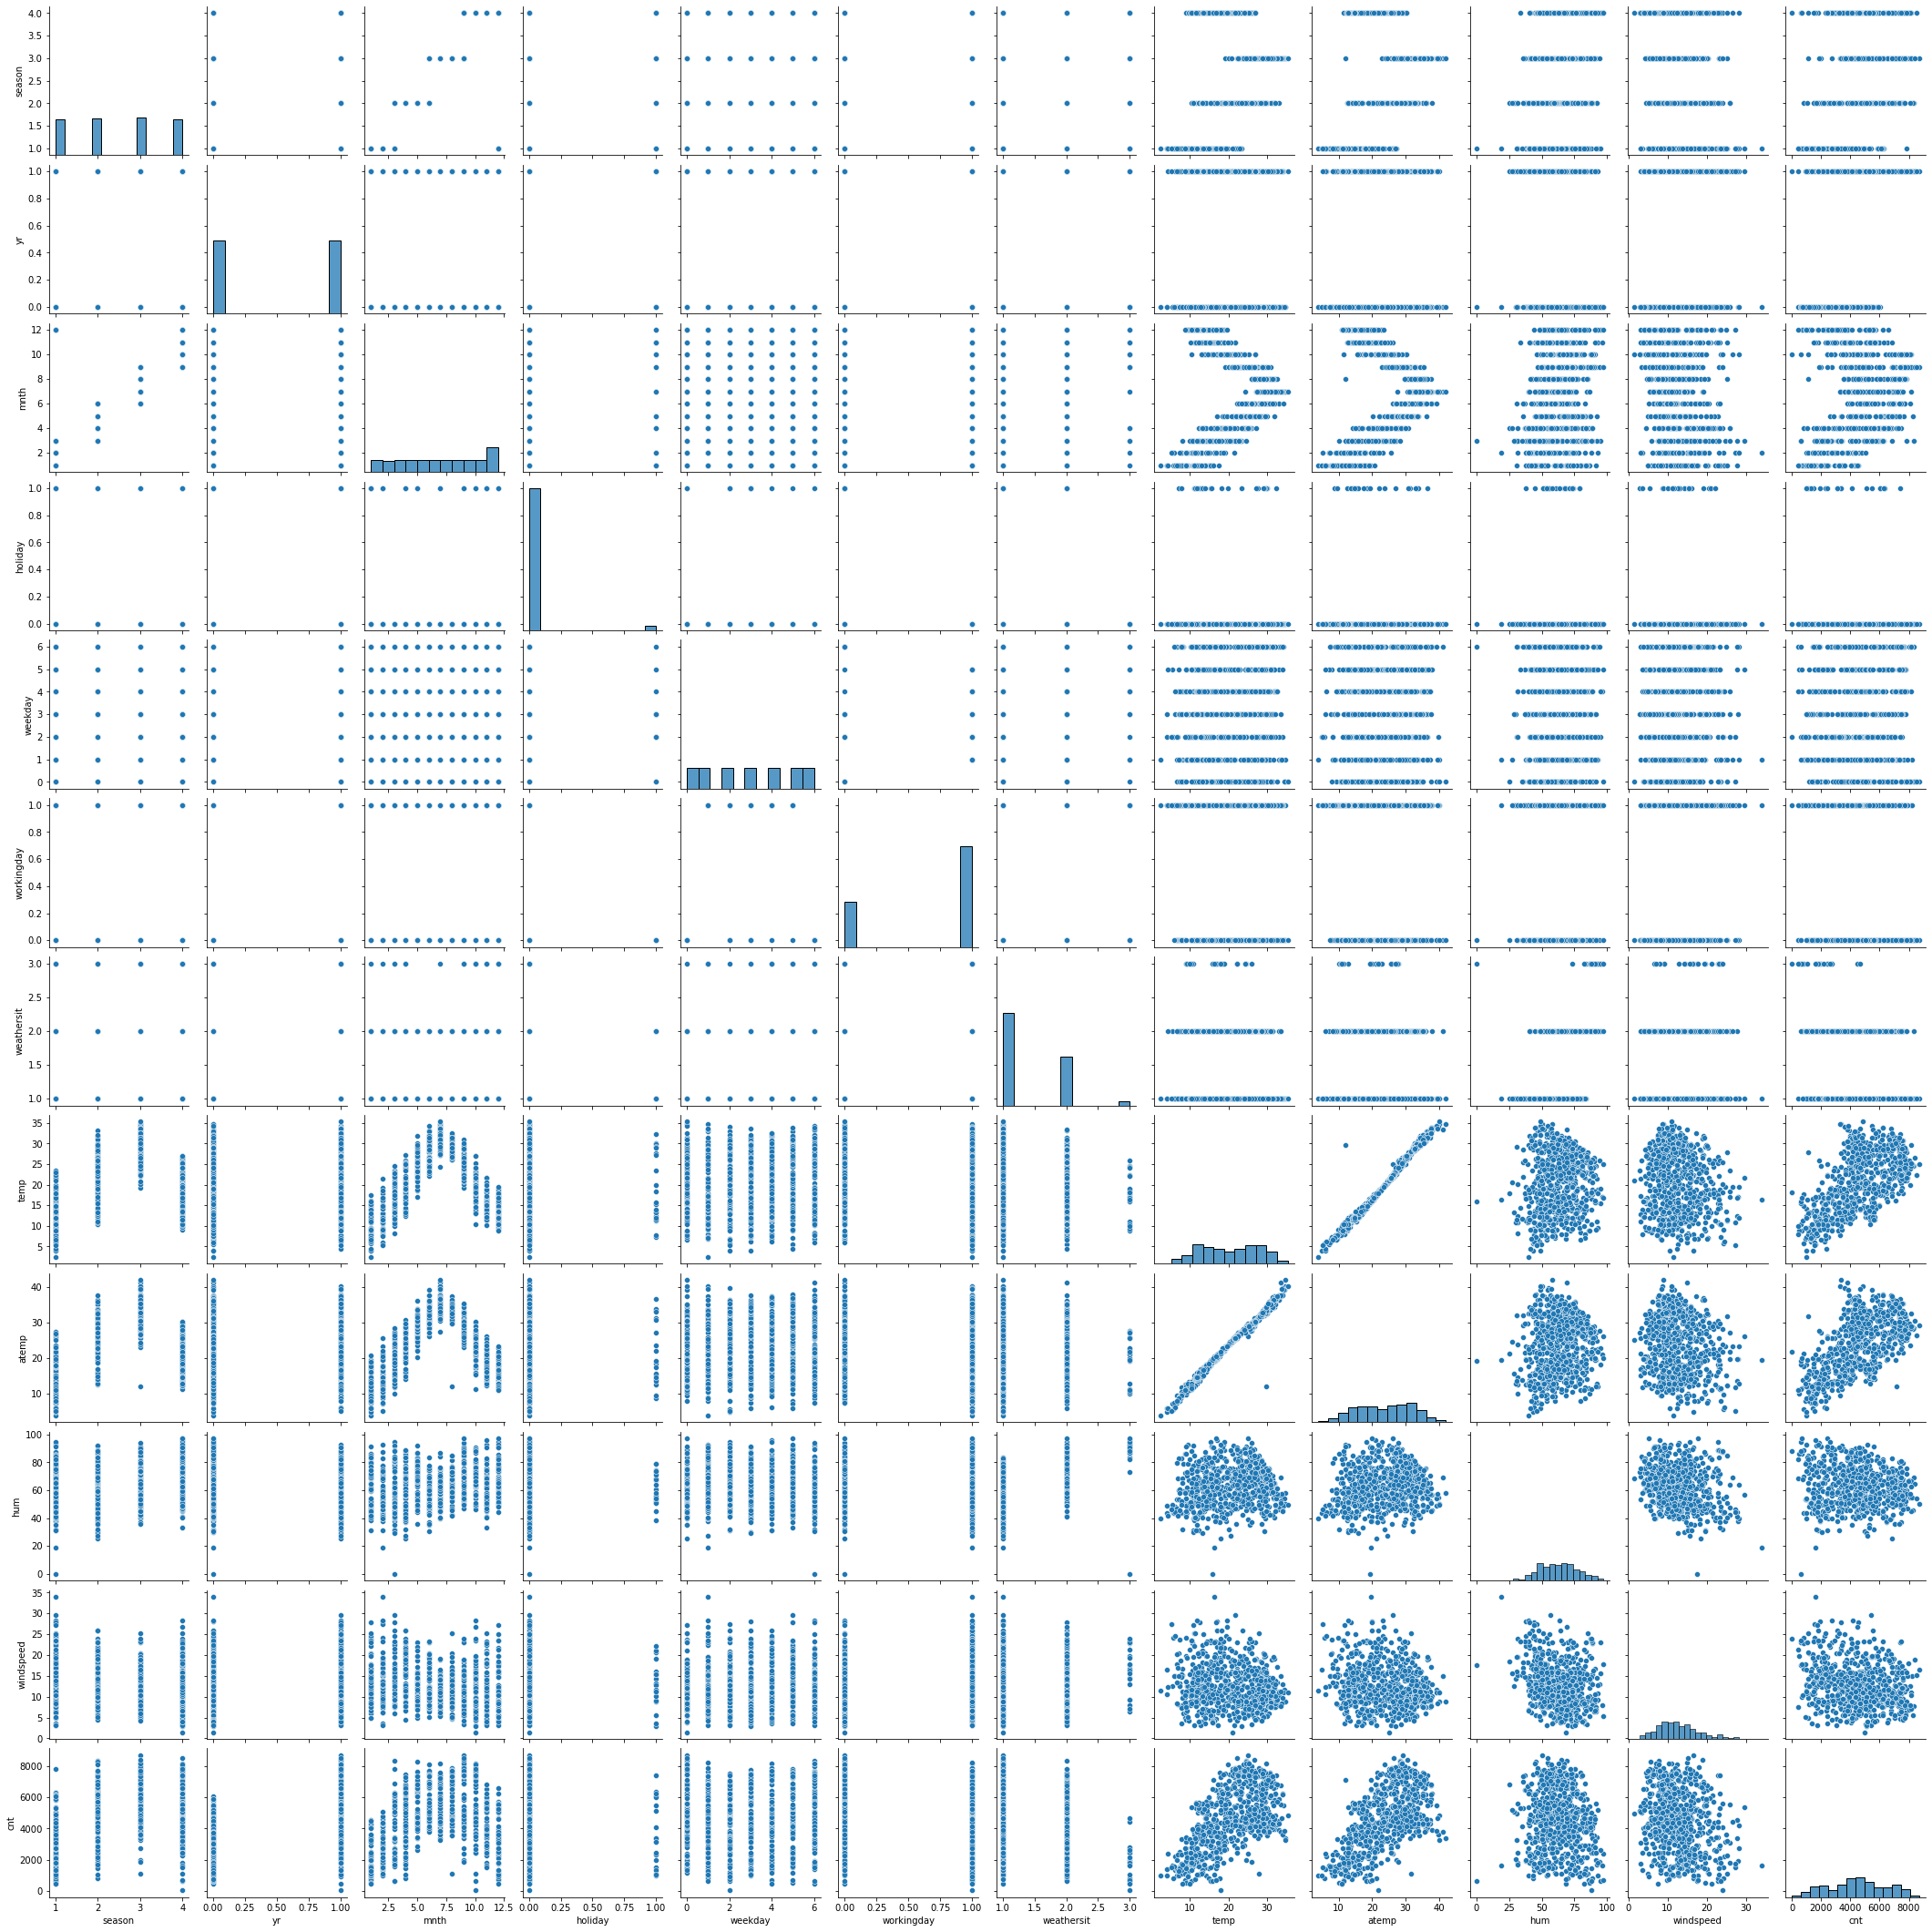

In [13]:
plt.figure(figsize=(30,20))
sns.pairplot(bike_sharing)
plt.show()

- There is a linear relationship between some valiables like Cnt and temp and cut and atemp.
- Temp and atemp are highly corelated with each other.
- Demand is increasing yearly.

In [14]:
num_var = ['temp','atemp', 'hum', 'windspeed', 'cnt']

<Figure size 360x360 with 0 Axes>

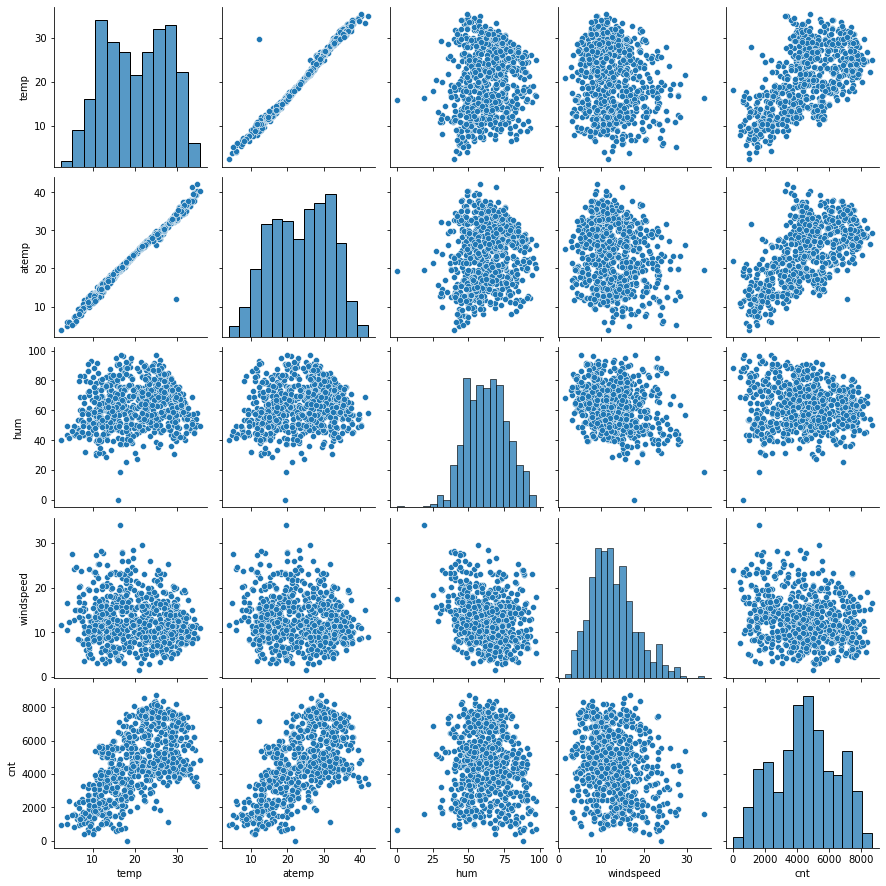

In [74]:
plt.figure(figsize=(5,5))
sns.pairplot(bike_sharing[num_var])
plt.show()

### Visualization of categonical variable

In [16]:
cat_var = ['season','yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

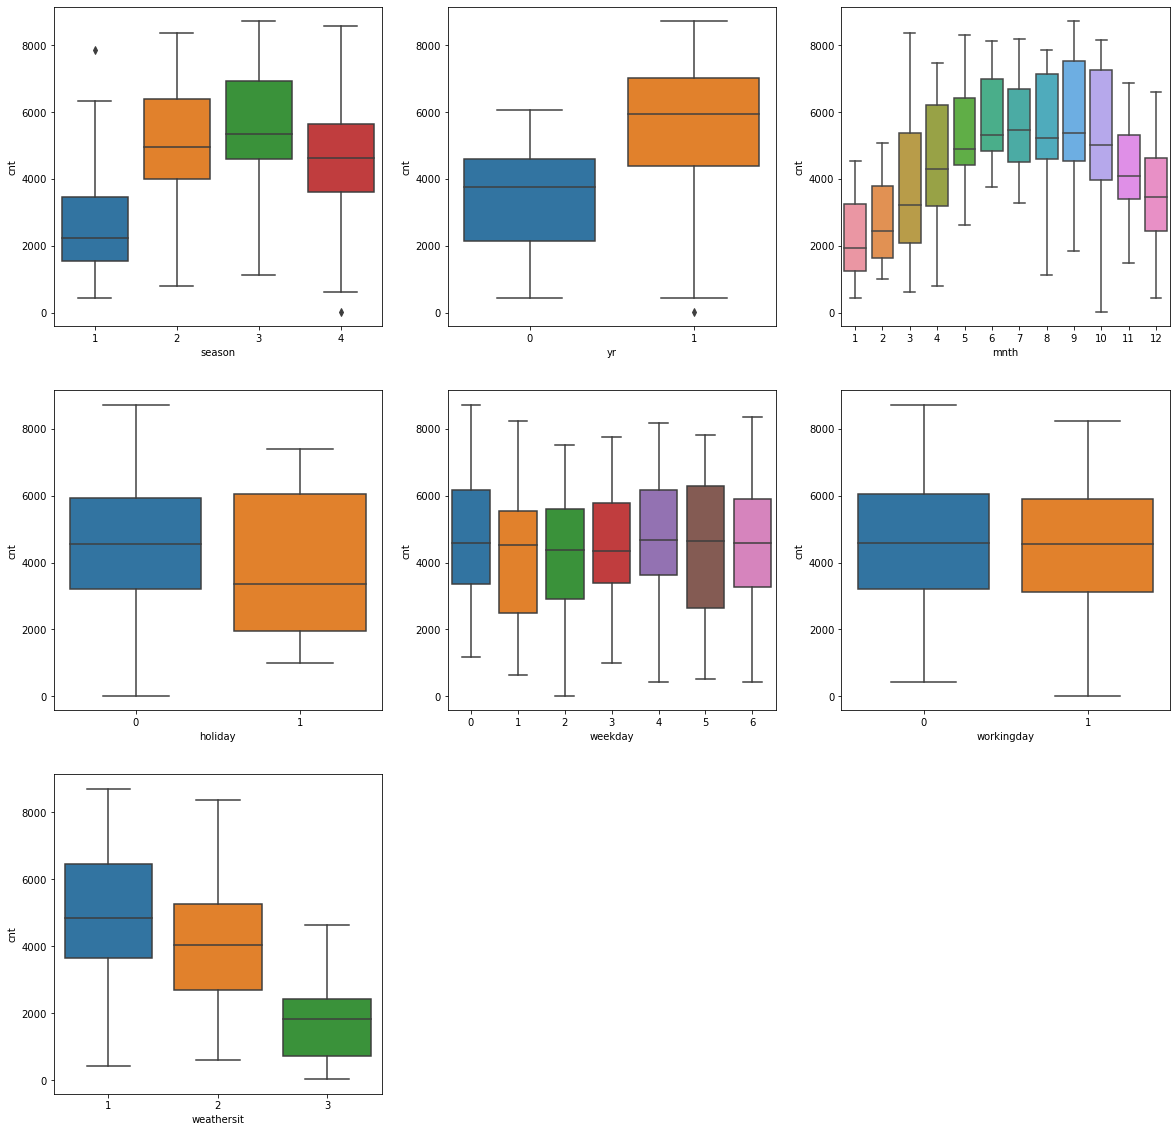

In [17]:
plt.figure(figsize= (20,20))
plt.subplot(3,3,1)
sns.boxplot(x= cat_var[0], y= 'cnt', data= bike_sharing)

plt.subplot(3,3,2)
sns.boxplot(x= cat_var[1], y= 'cnt', data= bike_sharing)

plt.subplot(3,3,3)
sns.boxplot(x= cat_var[2], y= 'cnt', data= bike_sharing)

plt.subplot(3,3,4)
sns.boxplot(x= cat_var[3], y= 'cnt', data= bike_sharing)

plt.subplot(3,3,5)
sns.boxplot(x= cat_var[4], y= 'cnt', data= bike_sharing)

plt.subplot(3,3,6)
sns.boxplot(x= cat_var[5], y= 'cnt', data= bike_sharing)

plt.subplot(3,3,7)
sns.boxplot(x= cat_var[6], y= 'cnt', data= bike_sharing)

plt.show()


- There is no outliers in the data.
- Seasion 3 has highest demand of bike share.
- Demand is increasing yearly.
- Demand of bike sharing is increasing till 9th month after that it slightly reduces.
- Holidays have less demand.
- Weekends have more demand.
- Weathersit 1 has highest demand of bike sharing.

### Heatmap

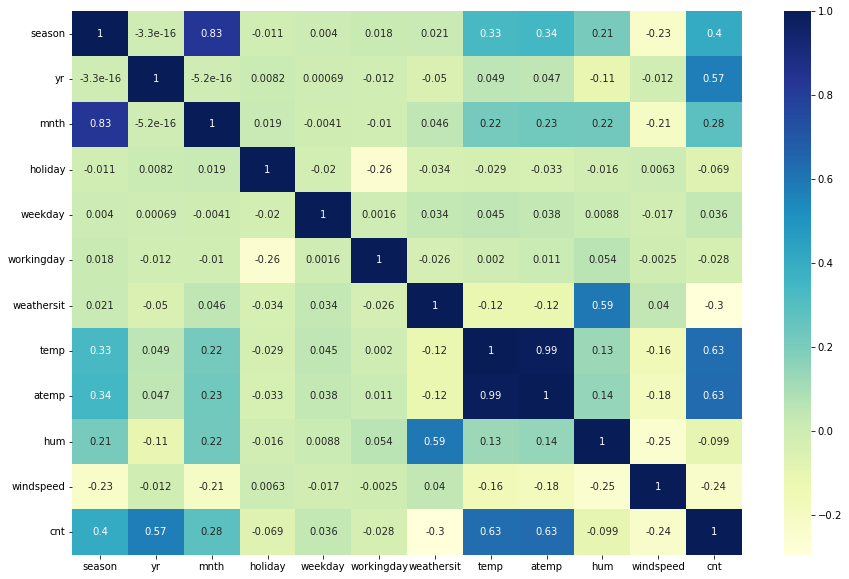

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(bike_sharing.corr(), annot= True, cmap= 'YlGnBu')
plt.show()

- Cnt is highly co-related with temp, atemp and yr.




# Step 2: Preparing the Data

### Converting numerical variable into details

In [19]:
bike_sharing.season.replace({1: 'spring', 2:'summer',3: 'fall', 4: 'winter'}, inplace=True)

bike_sharing.mnth.replace({1: 'Jan', 2:'Feb',3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)

bike_sharing.weekday.replace({0: 'Sun', 1: 'Mon', 2:'Tue',3: 'Wed', 4: 'Thur', 5: 'Fri', 6: 'Sat'}, inplace=True)

bike_sharing.weathersit.replace({1: 'Clear', 2:'Mist & Cloudy',3: 'Light Snow & Rain', 4: 'Heavy Rain & Snow'}, inplace=True)


In [20]:
# Re-Checking the data

bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating dummy variables of catagorical variable who has more then binary variable

In [21]:
shift = bike_sharing[['season', 'mnth', 'weekday', 'weathersit']]
shift = pd.get_dummies(shift, drop_first=True)

In [22]:
# Joining both the data

bike_sharing = pd.concat([bike_sharing, shift], axis=1)

In [23]:
# Checking the data again

bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,spring,0,Jan,0,Mon,1,Mist & Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist & Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Drop extra column

bike_sharing = bike_sharing.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)

In [25]:
bike_sharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

# Step 3: Data Spliting in train and test 

In [26]:
bike_sharing_train, bike_sharing_test = train_test_split(bike_sharing, train_size= 0.7, random_state= 100)

In [27]:
# Chacking the train and test dataset

print(bike_sharing.shape)
print(bike_sharing_train.shape)
print(bike_sharing_test.shape)

(730, 30)
(510, 30)
(220, 30)


## Rescaling the Features

I am using MinMax scaling to rescale the continuous variables to make the whole data in same scale.

In [28]:
scaler = MinMaxScaler()

In [29]:
# Apply scaler() to all the continuous variable columns

num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_sharing_train[num_var]= scaler.fit_transform(bike_sharing_train[num_var])

In [30]:
# checking the data

bike_sharing_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Creating X and y

In [31]:
y_train = bike_sharing_train.pop('cnt')
X_train = bike_sharing_train

# Step 4: Training the model by using RFE

In [32]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thur', False, 14),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thur', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [36]:
# Creating X_train dataset with RFE selected variables

X_train_rfe = X_train[col]

In [37]:
# Adding the constant value

X_train_rfe = sm.add_constant(X_train_rfe)

In [38]:
# Running the Linear Regression Model

lm = sm.OLS(y_train, X_train_rfe)

# fitting

lm_model = lm.fit()

# Checking the Summary of the model

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.15e-189
Time:                        03:01:46   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3197      0.036      8.859      0.000       0.249       0.391
yr                               0.2304      0.008     28.487      0.000       0.215       0.246
holiday                         -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                             0.4815      0.037     13.005      0.000       0.409       0.554
hum                             -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                       -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_spring                   -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer                    0.0423      0.015      2.761      0.006       0.012       0.072
season_winter                    0.1019      0.018      5.656      0.000       0.067       0.137
mnth_Dec                        -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_Jan                        -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_Jul                        -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_Nov                        -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_Sep                         0.0755      0.017      4.466      0.000       0.042       0.109
weathersit_Light Snow & Rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weathersit_Mist & Cloudy        -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking VIF

In [39]:
# Importing Libraries for checking VIF values 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.52
6,season_spring,5.27
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.77
4,hum,1.92
12,mnth_Nov,1.77
10,mnth_Jan,1.68
15,weathersit_Mist & Cloudy,1.57
9,mnth_Dec,1.50


Removing season_spring column as it has Low P-Value but High VIF 

In [41]:
X_train_rfe = X_train_rfe.drop('season_spring', axis= 1)

### Model 2

In [42]:
# Adding the constant value

X_train_rfe = sm.add_constant(X_train_rfe)

# Running the Linear Regression Model

lm = sm.OLS(y_train, X_train_rfe)

# fitting

lm_model = lm.fit()

# Checking the Summary of the model

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.50e-188
Time:                        03:01:46   Log-Likelihood:                 509.94
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     495   BIC:                            -926.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2562      0.029      8.899      0.000       0.200       0.313
yr                               0.2290      0.008     28.159      0.000       0.213       0.245
holiday                         -0.0946      0.026     -3.670      0.000      -0.145      -0.044
temp                             0.5550      0.027     20.527      0.000       0.502       0.608
hum                             -0.1742      0.038     -4.601      0.000      -0.249      -0.100
windspeed                       -0.1971      0.026     -7.634      0.000      -0.248      -0.146
season_summer                    0.0729      0.011      6.548      0.000       0.051       0.095
season_winter                    0.1369      0.013     10.204      0.000       0.111       0.163
mnth_Dec                        -0.0295      0.018     -1.683      0.093      -0.064       0.005
mnth_Jan                        -0.0472      0.018     -2.590      0.010      -0.083      -0.011
mnth_Jul                        -0.0452      0.018     -2.509      0.012      -0.081      -0.010
mnth_Nov                        -0.0288      0.019     -1.548      0.122      -0.065       0.008
mnth_Sep                         0.0903      0.016      5.571      0.000       0.058       0.122
weathersit_Light Snow & Rain    -0.2402      0.027     -9.058      0.000      -0.292      -0.188
weathersit_Mist & Cloudy        -0.0514      0.010     -4.906      0.000      -0.072      -0.031
==============================================================================
Omnibus:                       58.341   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.396
Skew:                          -0.649   Prob(JB):                     4.36e-27
Kurtosis:                       5.007   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.76
3,temp,2.32
7,season_winter,2.09
4,hum,1.90
11,mnth_Nov,1.71
9,mnth_Jan,1.67
14,weathersit_Mist & Cloudy,1.55
8,mnth_Dec,1.48
6,season_summer,1.44
10,mnth_Jul,1.43


Removing mnth_Nov column as it has high P-Value and Low VIF

In [44]:
X_train_rfe = X_train_rfe.drop('mnth_Nov', axis= 1)

### Model 3

In [45]:
# Adding the constant value

X_train_rfe = sm.add_constant(X_train_rfe)

# Running the Linear Regression Model

lm = sm.OLS(y_train, X_train_rfe)

# fitting

lm_model = lm.fit()

# Checking the Summary of the model

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          7.91e-189
Time:                        03:01:46   Log-Likelihood:                 508.71
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     496   BIC:                            -930.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2502      0.029      8.758      0.000       0.194       0.306
yr                               0.2290      0.008     28.118      0.000       0.213       0.245
holiday                         -0.0991      0.026     -3.863      0.000      -0.149      -0.049
temp                             0.5624      0.027     21.111      0.000       0.510       0.615
hum                             -0.1736      0.038     -4.580      0.000      -0.248      -0.099
windspeed                       -0.1971      0.026     -7.621      0.000      -0.248      -0.146
season_summer                    0.0740      0.011      6.651      0.000       0.052       0.096
season_winter                    0.1263      0.012     10.926      0.000       0.104       0.149
mnth_Dec                        -0.0191      0.016     -1.177      0.240      -0.051       0.013
mnth_Jan                        -0.0431      0.018     -2.388      0.017      -0.079      -0.008
mnth_Jul                        -0.0461      0.018     -2.556      0.011      -0.082      -0.011
mnth_Sep                         0.0930      0.016      5.760      0.000       0.061       0.125
weathersit_Light Snow & Rain    -0.2377      0.027     -8.968      0.000      -0.290      -0.186
weathersit_Mist & Cloudy        -0.0511      0.010     -4.865      0.000      -0.072      -0.030
==============================================================================
Omnibus:                       55.188   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.061
Skew:                          -0.625   Prob(JB):                     4.64e-25
Kurtosis:                       4.926   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.81
3,temp,2.25
4,hum,1.90
9,mnth_Jan,1.63
7,season_winter,1.55
13,weathersit_Mist & Cloudy,1.55
6,season_summer,1.44
10,mnth_Jul,1.43
8,mnth_Dec,1.26
12,weathersit_Light Snow & Rain,1.25


Removing mnth_Dec column as it has high P-Value and Low VIF

In [47]:
X_train_rfe = X_train_rfe.drop('mnth_Dec', axis= 1)

### Model 4

In [48]:
# Adding the constant value

X_train_rfe = sm.add_constant(X_train_rfe)

# Running the Linear Regression Model

lm = sm.OLS(y_train, X_train_rfe)

# fitting

lm_model = lm.fit()

# Checking the Summary of the model

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.3
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.04e-189
Time:                        03:01:46   Log-Likelihood:                 507.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     497   BIC:                            -934.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2449      0.028      8.677      0.000       0.189       0.300
yr                               0.2289      0.008     28.098      0.000       0.213       0.245
holiday                         -0.0980      0.026     -3.824      0.000      -0.148      -0.048
temp                             0.5715      0.026     22.407      0.000       0.521       0.622
hum                             -0.1779      0.038     -4.714      0.000      -0.252      -0.104
windspeed                       -0.1948      0.026     -7.551      0.000      -0.245      -0.144
season_summer                    0.0756      0.011      6.843      0.000       0.054       0.097
season_winter                    0.1248      0.011     10.859      0.000       0.102       0.147
mnth_Jan                        -0.0382      0.018     -2.174      0.030      -0.073      -0.004
mnth_Jul                        -0.0468      0.018     -2.594      0.010      -0.082      -0.011
mnth_Sep                         0.0944      0.016      5.858      0.000       0.063       0.126
weathersit_Light Snow & Rain    -0.2349      0.026     -8.895      0.000      -0.287      -0.183
weathersit_Mist & Cloudy        -0.0504      0.010     -4.804      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       53.439   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.260
Skew:                          -0.611   Prob(JB):                     5.11e-24
Kurtosis:                       4.885   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.59
3,temp,2.06
4,hum,1.88
8,mnth_Jan,1.55
12,weathersit_Mist & Cloudy,1.55
7,season_winter,1.53
9,mnth_Jul,1.43
6,season_summer,1.41
11,weathersit_Light Snow & Rain,1.24
5,windspeed,1.19


Removing mnth_Jan column as it has high P-Value and Low VIF

In [50]:
X_train_rfe = X_train_rfe.drop('mnth_Jan', axis= 1)

### Model 5

In [51]:
# Adding the constant value

X_train_rfe = sm.add_constant(X_train_rfe)

# Running the Linear Regression Model

lm = sm.OLS(y_train, X_train_rfe)

# fitting

lm_model = lm.fit()

# Checking the Summary of the model

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          6.89e-190
Time:                        03:01:46   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2262      0.027      8.384      0.000       0.173       0.279
yr                               0.2280      0.008     27.917      0.000       0.212       0.244
holiday                         -0.0989      0.026     -3.844      0.000      -0.149      -0.048
temp                             0.5977      0.023     26.494      0.000       0.553       0.642
hum                             -0.1841      0.038     -4.876      0.000      -0.258      -0.110
windspeed                       -0.1895      0.026     -7.351      0.000      -0.240      -0.139
season_summer                    0.0815      0.011      7.580      0.000       0.060       0.103
season_winter                    0.1347      0.011     12.732      0.000       0.114       0.155
mnth_Jul                        -0.0478      0.018     -2.640      0.009      -0.083      -0.012
mnth_Sep                         0.0962      0.016      5.957      0.000       0.064       0.128
weathersit_Light Snow & Rain    -0.2318      0.026     -8.757      0.000      -0.284      -0.180
weathersit_Mist & Cloudy        -0.0502      0.011     -4.771      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       52.291   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.838
Skew:                          -0.600   Prob(JB):                     1.72e-23
Kurtosis:                       4.869   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.97
4,hum,1.87
3,temp,1.60
11,weathersit_Mist & Cloudy,1.55
8,mnth_Jul,1.43
6,season_summer,1.33
7,season_winter,1.29
10,weathersit_Light Snow & Rain,1.24
9,mnth_Sep,1.19
5,windspeed,1.18


Removing mnth_Jul column as it has high P-Value and Low VIF

In [53]:
X_train_rfe = X_train_rfe.drop('mnth_Jul', axis= 1)

### Model 6

In [54]:
# Adding the constant value

X_train_rfe = sm.add_constant(X_train_rfe)

# Running the Linear Regression Model

lm = sm.OLS(y_train, X_train_rfe)

# fitting

lm_model = lm.fit()

# Checking the Summary of the model

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.32e-189
Time:                        03:01:47   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2261      0.027      8.331      0.000       0.173       0.279
yr                               0.2289      0.008     27.895      0.000       0.213       0.245
holiday                         -0.0975      0.026     -3.766      0.000      -0.148      -0.047
temp                             0.5708      0.020     28.208      0.000       0.531       0.611
hum                             -0.1756      0.038     -4.639      0.000      -0.250      -0.101
windspeed                       -0.1870      0.026     -7.217      0.000      -0.238      -0.136
season_summer                    0.0907      0.010      8.847      0.000       0.071       0.111
season_winter                    0.1391      0.011     13.239      0.000       0.118       0.160
mnth_Sep                         0.1069      0.016      6.802      0.000       0.076       0.138
weathersit_Light Snow & Rain    -0.2353      0.027     -8.848      0.000      -0.288      -0.183
weathersit_Mist & Cloudy        -0.0503      0.011     -4.754      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       60.193   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.461
Skew:                          -0.670   Prob(JB):                     9.41e-28
Kurtosis:                       5.015   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.97
4,hum,1.86
10,weathersit_Mist & Cloudy,1.55
3,temp,1.27
7,season_winter,1.25
9,weathersit_Light Snow & Rain,1.23
6,season_summer,1.19
5,windspeed,1.18
8,mnth_Sep,1.11
1,yr,1.03


Now the model looks good as all the variable have low P-Value and low VIF.

In [56]:
lm_model.params

const                           0.226132
yr                              0.228910
holiday                        -0.097453
temp                            0.570769
hum                            -0.175596
windspeed                      -0.187000
season_summer                   0.090651
season_winter                   0.139117
mnth_Sep                        0.106905
weathersit_Light Snow & Rain   -0.235328
weathersit_Mist & Cloudy       -0.050318
dtype: float64

# Final Equation of model

cnt = 0.226 + (0.229 x Yr) - (0.097 x holiday) + (0.571 x temp)  - (0.175 x hum) - (0.187 x windspeed) + (0.091 x season_summer) + (0.139 x season_winter) + (0.107 x mnth_Sep) - (0.235 x weathersit_Light Snow & Rain) - (0.050 x weathersit_Mist & Cloudy)

# Step 5: Residual Analysis

In [57]:
y_train_pred = lm_model.predict(X_train_rfe)

In [58]:
red = y_train - y_train_pred

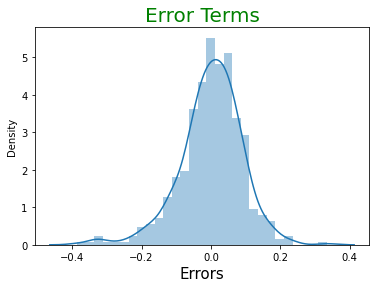

In [59]:
sns.distplot(red)

plt.title('Error Terms', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
plt.xlabel('Errors', fontsize = 15)
plt.show()

Errors are normally distribured here with mean 0

# Step 6: Predictions and Evaluation

In [60]:
# Rescaling the test data

bike_sharing_test[num_var]= scaler.transform(bike_sharing_test[num_var])


In [61]:
bike_sharing_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
y_test = bike_sharing_test.pop('cnt')
X_test = bike_sharing_test

In [63]:
X_train_rfe = X_train_rfe.drop('const', axis= 1)

# Creating X_test dataframe by dropping variables from X_test

X_test = X_test[X_train_rfe.columns]


In [64]:
# Adding constant variable 

X_test = sm.add_constant(X_test)

In [65]:
y_test_pred = lm_model.predict(X_test)

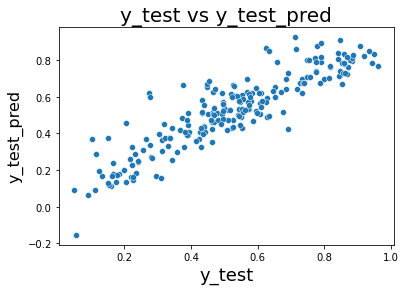

In [66]:
plt.figure()
sns.scatterplot(y_test, y_test_pred)
plt.title('y_test vs y_test_pred', fontsize=20)     
plt.xlabel('y_test', fontsize=18)                 
plt.ylabel('y_test_pred', fontsize=16) 
plt.show()

In [67]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true= y_test ,y_pred = y_test_pred)
r2

0.8051741066002439

# Final model

In [68]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.32e-189
Time:                        03:01:48   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2261      0.027      8.331      0.000       0.173       0.279
yr                               0.2289      0.008     27.895      0.000       0.213       0.245
holiday                         -0.0975      0.026     -3.766      0.000      -0.148      -0.047
temp                             0.5708      0.020     28.208      0.000       0.531       0.611
hum                             -0.1756      0.038     -4.639      0.000      -0.250      -0.101
windspeed                       -0.1870      0.026     -7.217      0.000      -0.238      -0.136
season_summer                    0.0907      0.010      8.847      0.000       0.071       0.111
season_winter                    0.1391      0.011     13.239      0.000       0.118       0.160
mnth_Sep                         0.1069      0.016      6.802      0.000       0.076       0.138
weathersit_Light Snow & Rain    -0.2353      0.027     -8.848      0.000      -0.288      -0.183
weathersit_Mist & Cloudy        -0.0503      0.011     -4.754      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       60.193   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.461
Skew:                          -0.670   Prob(JB):                     9.41e-28
Kurtosis:                       5.015   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
lm_model.params

const                           0.226132
yr                              0.228910
holiday                        -0.097453
temp                            0.570769
hum                            -0.175596
windspeed                      -0.187000
season_summer                   0.090651
season_winter                   0.139117
mnth_Sep                        0.106905
weathersit_Light Snow & Rain   -0.235328
weathersit_Mist & Cloudy       -0.050318
dtype: float64

#### R- Sqaured train :  0.837 
#### Adj . R- Sqaured train :  0.834
#### R- Sqaured test :  0.805

### This model is 83.7% accurate.
### The variables' coefficients explain the factors influencing bike demand.
### Year, Temperature (temp) and weathersit Light Snow & Rain were discovered to be the top parameters on which bike demand is dependent.

### Best fit line equation is:
### cnt = 0.226 + (0.229 x Yr) - (0.097 x holiday) + (0.571 x temp)  - (0.175 x hum) - (0.187 x windspeed) + (0.091 x season_summer) + (0.139 x season_winter) + (0.107 x mnth_Sep) - (0.235 x weathersit_Light Snow & Rain) - (0.050 x weathersit_Mist & Cloudy)